# Problem 9.4
# Implemetation of K-Means

In [92]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt

# 1. K-Means Algorithm

In [90]:
def kmean(input_df, cluster_num, seed):
    """
    This function returns n clusters from input_df.
    It has three inputs:
    1. input_df: the df of training data
    2. cluster_num: integer, the number of clusters
    3. seed: the seed for repulication
    """
    np.random.seed(seed)
    initial_index = np.random.choice(input_df.index, cluster_num, replace=False)
    centroids = [input_df.loc[i].values for i in initial_index]
    
    cluster_output = {'init':[]}
    cluster_dict = {}
    
    while cluster_output != cluster_dict:
        cluster_output = copy.deepcopy(cluster_dict)
    
        cluster_dict = {}
        for i in range(cluster_num):
            cluster_dict[i] = []

        for i in range(len(input_df)):
            row = input_df.iloc[i].values
            euclidean_distance = [np.sqrt(np.sum((row - centroids[j]) ** 2)) 
                                  for j in range(cluster_num)]
            index_nearest_centroid = euclidean_distance.index(np.min(euclidean_distance))
            cluster_dict[index_nearest_centroid].append(i)
            
        for k in cluster_dict:
            vectors = input_df.iloc[cluster_dict[k]].values
            centroids[k] = np.mean(vectors,axis=0)

    return cluster_output  

# 2. Train the Model

In [112]:
data = pd.read_csv('../../data/data4.txt', delimiter=' ')

In [93]:
k_means_cluster = kmean(data, 3, 0)
k_means_cluster

{0: [5, 7, 9, 10, 11, 14, 17, 18, 19, 22, 23, 24, 27, 29],
 1: [0, 1, 3, 21, 25, 26, 28],
 2: [2, 4, 6, 8, 12, 13, 15, 16, 20]}

# 3. Visualization

In [103]:
data['class'] = 0
for k in k_means_cluster:
    data['class'].iloc[k_means_cluster[k]] = k

/Users/shen/anaconda/envs/python36/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [104]:
data.head()

,density,sugar,class
0,0.697,0.460,1
1,0.774,0.376,1
2,0.634,0.264,2
3,0.608,0.318,1
4,0.556,0.215,2


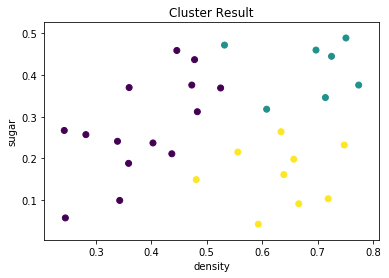

In [111]:
plt.scatter(data.density, data.sugar, c=data['class'], marker='o')
plt.title('Cluster Result')
plt.xlabel('density')
plt.ylabel('sugar')
plt.show()